In [10]:
import sklearn
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt


# Loading the dataset from tensorflow with splits both train and test dataset
# Test split has 256 examples, train split has 1027 examples
# Turns into TFRecord files
train_dataset,info = tfds.load('horses_or_humans', with_info = True, split='train', as_supervised=True)
val_dataset,val_info = tfds.load("horses_or_humans", with_info=True, split='test', as_supervised=True)

In [11]:
# Preparing the data
train_dataset = train_dataset.batch(32).prefetch(1)
val_dataset = val_dataset.batch(32)

In [12]:
model = tf.keras.models.Sequential([
    # Input layer as flatten, makes it a 1 dimension array with colors (3) rgb
    tf.keras.layers.Flatten(input_shape=[300, 300, 3]),

    # Hidden layers
    tf.keras.layers.Dense(units=300, activation='relu'),
    tf.keras.layers.Dense(units=300, activation='relu'),
    
    tf.keras.layers.Dropout(rate=0.2),
    # Output layer
    # Softmax for multiclass classification
    tf.keras.layers.Dense(units=2, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 270000)            0         
                                                                 
 dense_3 (Dense)             (None, 300)               81000300  
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 2)                 602       
                                                                 
Total params: 81,091,202
Trainable params: 81,091,202
Non-trainable params: 0
_________________________________________________________________


In [13]:
# "sparse_categorical_crossentropy" is the loss function to use for classification when the classes are exclusive.
# 'adam' is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# "accuracy" enables us to measure the accuracy during training and evaluation.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=15, validation_data=val_dataset)

Epoch 1/15
33/33 [==============================] - 19s 555ms/step - loss: 9940.4287 - accuracy: 0.5316 - val_loss: 2500.4543 - val_accuracy: 0.5000
Epoch 2/15
33/33 [==============================] - 19s 582ms/step - loss: 257.4988 - accuracy: 0.7838 - val_loss: 373.7391 - val_accuracy: 0.6680
Epoch 3/15
33/33 [==============================] - 19s 566ms/step - loss: 358.7685 - accuracy: 0.7001 - val_loss: 2263.5728 - val_accuracy: 0.5039
Epoch 4/15
33/33 [==============================] - 17s 511ms/step - loss: 342.2931 - accuracy: 0.7702 - val_loss: 202.5188 - val_accuracy: 0.8633
Epoch 5/15
33/33 [==============================] - 16s 475ms/step - loss: 63.8101 - accuracy: 0.8705 - val_loss: 472.0555 - val_accuracy: 0.6875
Epoch 6/15
33/33 [==============================] - 16s 499ms/step - loss: 60.6098 - accuracy: 0.8793 - val_loss: 394.9923 - val_accuracy: 0.7305
Epoch 7/15
33/33 [==============================] - 16s 494ms/step - loss: 154.2195 - accuracy: 0.8111 - val_loss: 65

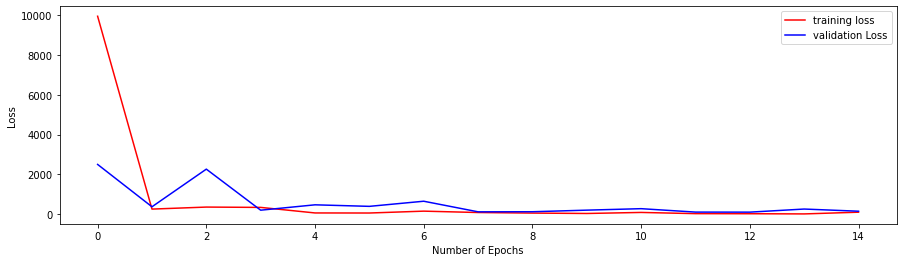

In [14]:
plt.figure(figsize=(15, 4))
plt.plot(range(15), history.history['loss'], 'r', label='training loss')
plt.plot(range(15), history.history['val_loss'], 'b', label='validation Loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Loss")
plt.show()

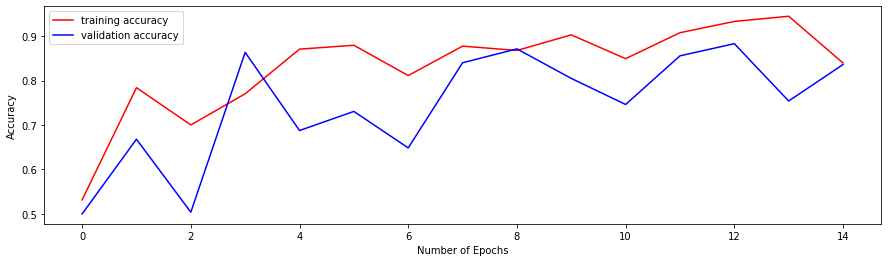

In [15]:
plt.figure(figsize=(15, 4))
plt.plot(range(15), history.history['accuracy'], 'r', label='training accuracy')
plt.plot(range(15), history.history['val_accuracy'], 'b', label='validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Accuracy")
plt.show()

In [16]:
model.save_weights('My_model.h5')
model.load_weights('My_model.h5')

In [17]:
# Defining all test images
horse1 = 'images/hest_01.png'
horse2 = 'images/hest_02.png'
horse3 = 'images/hest_03.png'
horse4 = 'images/hest_04.png'
horse5 = 'images/hest_05.png'
horse6 = 'images/hest_06.png'
horse7 = 'images/hest_07.png'

human1 = 'images/human_01.png'
human2 = 'images/human_02.png'
human3 = 'images/human_03.png'

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np


def pred_horse_human(horse_human):
    test_image = image.load_img(horse_human, target_size = (300, 300))
    test_image = image.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis = 0)

    result = model.predict(test_image)

    pred = np.argmax(result)
    print(result, "-->", pred)


    if pred == 0:
        print("Predicted as a HORSE")
    else:
        print("Predicted as a HUMAN")

In [26]:
for horse_human in [horse1, horse2, horse3, horse4, horse5, horse6, horse7, human1, human2, human3]:
    pred_horse_human(horse_human)

[[0.97221655 0.02778351]] --> 0
Predicted as a HORSE
[[0.7769537  0.22304635]] --> 0
Predicted as a HORSE
[[9.9999976e-01 2.2829470e-07]] --> 0
Predicted as a HORSE
[[0.04239699 0.957603  ]] --> 1
Predicted as a HUMAN
[[9.999957e-01 4.273556e-06]] --> 0
Predicted as a HORSE
[[0.22089212 0.7791079 ]] --> 1
Predicted as a HUMAN
[[9.9999547e-01 4.4738572e-06]] --> 0
Predicted as a HORSE
[[4.1012016e-05 9.9995899e-01]] --> 1
Predicted as a HUMAN
[[9.9967837e-01 3.2162046e-04]] --> 0
Predicted as a HORSE
[[0.968501   0.03149903]] --> 0
Predicted as a HORSE


In [20]:
model.evaluate(val_dataset)

8/8 [==============================] - 1s 68ms/step - loss: 150.8570 - accuracy: 0.8359


[150.85702514648438, 0.8359375]